<a href="https://colab.research.google.com/github/mimiohashi/natural-language-data-science/blob/main/language_phylogeny_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NL2DS - Winter 2023

Assignment 5 -- Language Phylogeny and Clustering

**Mayumi Ohashi Chuapoco**

In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies."

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

# **Part 1**

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**A1: The Northeuralex datatset is a lexicostatistical database with words from over 20 language families. It is contructed by using orthographies or standard transcriptions to generate a unified IPA encoding. The purpose is for improving computational models of language relationships and language contact.**

Now, let's read in the wordforms in this dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)

Mounted at /content/drive/


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**A2: Language_ID is a 3-letter code for an individual language and more info and the full name and categories can be found in the languages csv. Concept_ID is what concept the word represents and its part of speech where words across languages which describe the same concept will share a Concept_ID. rawIPA is the IPA transcription of the word and IPA is a cleaned version where each symbol (or group of symbols representing a singular speech sound) is separated by a space and lengthened sounds are separated into multiple sounds, etc.**

Now let's read in some metadata about the languages.

In [ ]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `family`, `iso_code`, and `subfamily` columns of the data.

**A3: family is the broader family of languages the language comes from. iso_code is the code which is used as the Language_IDin the main wordforms csv. subfamily is a more specific language family the individual language belongs to.**

Now let's read in some further data about the concepts.

In [ ]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**A4: id_nelex is the code to be used as a Concept_ID for each matching word in the main wordforms csv. gloss_en gives us the english word for the concept in question. position_in_ranking is a ranking of the word in the corpus by frequency**

# **Part 2**

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [ ]:
# Problem 1a: rename the appropriate columns in the languages and concepts dataframes to make this merge possible.
#your code here
concepts = concepts.rename(columns={"id_nelex": "Concept_ID"})
languages = languages.rename(columns={"iso_code" : "Language_ID", "glotto_code" : "Glottocode"})
# Problem 1b: Use the merge function to merge the three dataframes into one.
#your code here
wordforms = wordforms.merge(languages, how="outer")
wordforms = wordforms.merge(concepts, how = "outer")

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,krl,kare1335,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
2,olo,livv1243,Auge::N,silmy,silmʏ,s i l m ʏ,silmi,SILMY,SVRMV,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
3,vep,veps1250,Auge::N,sil'm,silʲm,s i lʲ m,silm,SILM,SVRM,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
4,ekk,esto1258,Auge::N,silm,sʲilm,sʲ i l m,silm,SILM,SVRM,validate,...,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,che,chec1245,ertragen::V,садетта,sədetːə,s ə d e t t ə,s3det3,SETETE,SVTVTV,review,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121609,arb,stan1318,ertragen::V,أطاق,atˤaːqa,a tˤ a a q a,ataqa,ATAKA,VTVKV,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121610,arb,stan1318,ertragen::V,تحمل,taħamala,t a ħ a m a l a,taGamala,TAHAMALA,TVHVMVRV,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121611,heb,hebr1245,ertragen::V,סבל,saval,s a v a l,saval,SABAL,SVWVR,validate,...,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [ ]:
!pip install lingpy

In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [ ]:
#Problem 2a: Filter out the non-Indo-European languages from the dataframes
#your code here
wordforms1 = wordforms.loc[wordforms.family == "Indo-European"]

#Problem 2b: Filter the concepts to include those less than or equal to rank 20 in the dataframe.
# your code here
wordforms = wordforms1.loc[wordforms1.position_in_ranking <= 20]
display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,...,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
7163,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7164,hin,hind1269,Wasser::N,जल,d͡ʒəl,d͡ʒ ə l,j3l,CEL,KVR,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7165,hin,hind1269,Wasser::N,पानी,paːniː,p a a n i i,pani,PANI,PVNV,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7166,pbu,nort2646,Wasser::N,اوبه,oˈbə,o b ə,ob3,UPE,VPV,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7167,pes,west2369,Wasser::N,آب,ɒːb,ɒ ɒ b,ob,OP,VP,validate,...,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107539,cat,stan1289,geben::V,donar,d̪una,d u n a,duna,TYNA,TVNV,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107540,spa,stan1288,geben::V,dar,daɾ,d a ɾ,dar,TAR,TVR,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107541,por,port1283,geben::V,dar,dar,d a r,dar,TAR,TVR,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107542,ita,ital1282,geben::V,dare,dare,d a r e,dare,TARE,TVRV,validate,...,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN


# **Part 3**

Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we will compute the normalized levenshtein distance between the words for Wasser::N (water in English) for German and English and then similarily for all 19 other concepts. If there are multiple words for the same concept, take the average across all pair possibilities. We will then average these values (i.e., average across all concepts) to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [ ]:
import lingpy as lp
import numpy as np

#Problem 3: fill the confusion matrix  using the
#lp.align.pairwise.edit_dist function from lingpy, on
#the "IPA" fields for each language.

#initialize confusion matrix
language_list = wordforms.name.unique() # Initialise list of languages in the current modified wordforms dataset
confusion = [[0 for j in range(len(language_list))] for i in range(len(language_list))]

for lang1_ind in range(len(language_list)):
  language1 = language_list[lang1_ind]
  lang1_wf = wordforms.loc[wordforms.name == language1]
  for lang2_ind in range(len(language_list)):
    language2 = language_list[lang2_ind]
    lang2_wf = wordforms.loc[wordforms.name == language2]
    distances = 0.0
    for concept in range(1,20):
        con1 = lang1_wf.loc[lang1_wf.position_in_ranking == concept]
        con2 = lang2_wf.loc[lang2_wf.position_in_ranking == concept]

        dist = 0.0
        counter = 0
        # distances += lp.align.pairwise.edit_dist(con1.IPA[1], con2.IPA[1], True)

        for ipa1 in con1.IPA:
            for ipa2 in con2.IPA:
                dist += lp.align.pairwise.edit_dist(ipa1, ipa2, True)
                counter += 1

        distances += dist / counter
    confusion[lang1_ind][lang2_ind] = distances / 20
language_list = list(language_list)

confusion


Clear the output of the above cell (by clicking on the cross at top left of the output part) so that it doesn't clutter the pdf.

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages.


In [ ]:
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_list)

{0: ['Bengali', 'Hindi'],
 2: ['Northern Pashto', 'Ossetian', 'Western Farsi', 'Northern Kurdish'],
 6: ['Armenian'],
 7: ['Modern Greek'],
 8: ['Standard Albanian'],
 12: ['Slovak',
  'Polish',
  'Czech',
  'Belarusian',
  'Russian',
  'Ukrainian',
  'Bulgarian',
  'Croatian',
  'Slovene',
  'Lithuanian',
  'Latvian'],
 20: ['Icelandic',
  'Norwegian (Bokmål)',
  'Swedish',
  'Danish',
  'German',
  'Dutch',
  'English'],
 27: ['Irish'],
 28: ['Welsh', 'Breton'],
 30: ['Latin', 'Catalan', 'Spanish', 'Portuguese', 'Italian', 'Romanian'],
 31: ['French']}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?

**A5: The clusters are following pretty closely to the subcategories laid out. For example, Bengali and Hindi are both Indo-Aryan languages, and all the languages in cluster 20 are germanic. Irish and French, however, have been put alone in separate categories from their Celtic and Italic peers respectively. This may be because the pronounciation in these languages does not belie the underlying structure which is the root of their similarity.**


## **Part 4**

Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function.

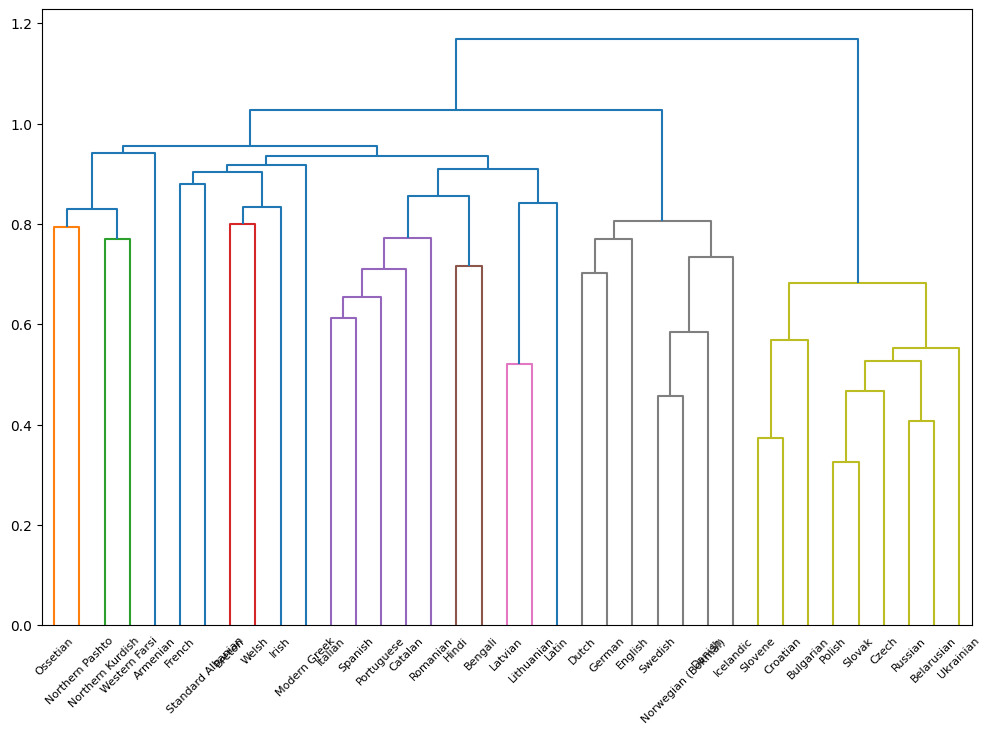

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

#Problem 4: use the linkage function with the average linkage method to compute the clustering.
linked = linkage(confusion, 'average')


#plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy errors in this clustering?

**A6: Again we can see the cluster of Germanic languages (grey) and Balto-Slavic languages (chartreuse). As errors, again we see French identified as very far away from other Italic languages and seen as branching off from the same roots as Celtic and Armenian.**

# **Part 5**

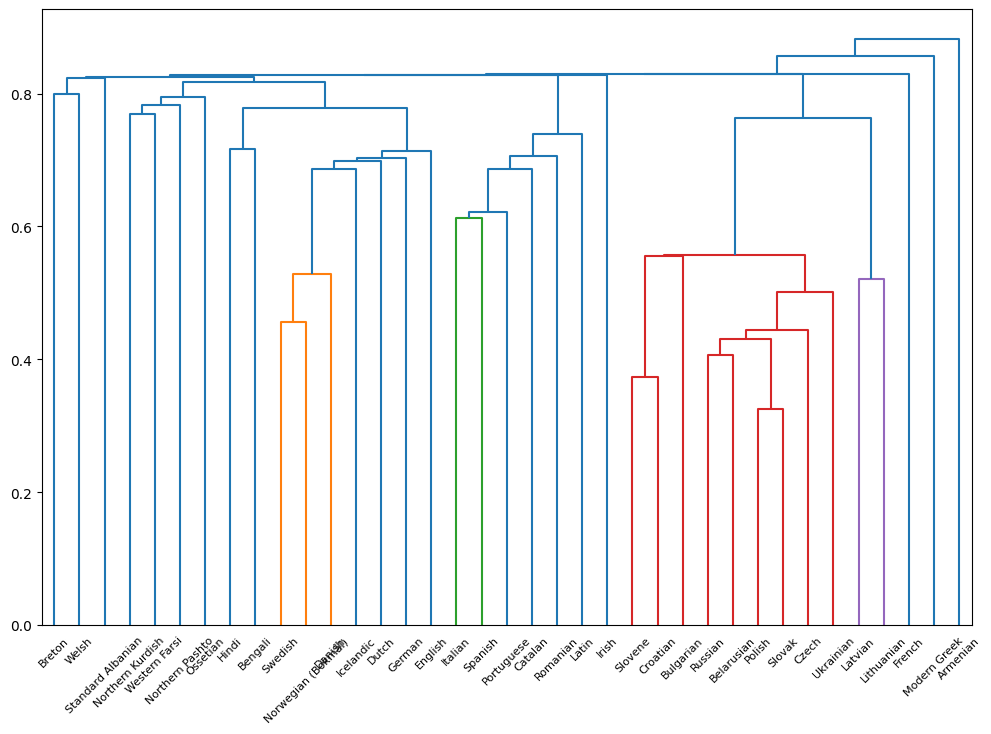

In [ ]:
## question 7 code:

linked_single = linkage(confusion, 'single')

#plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_single,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

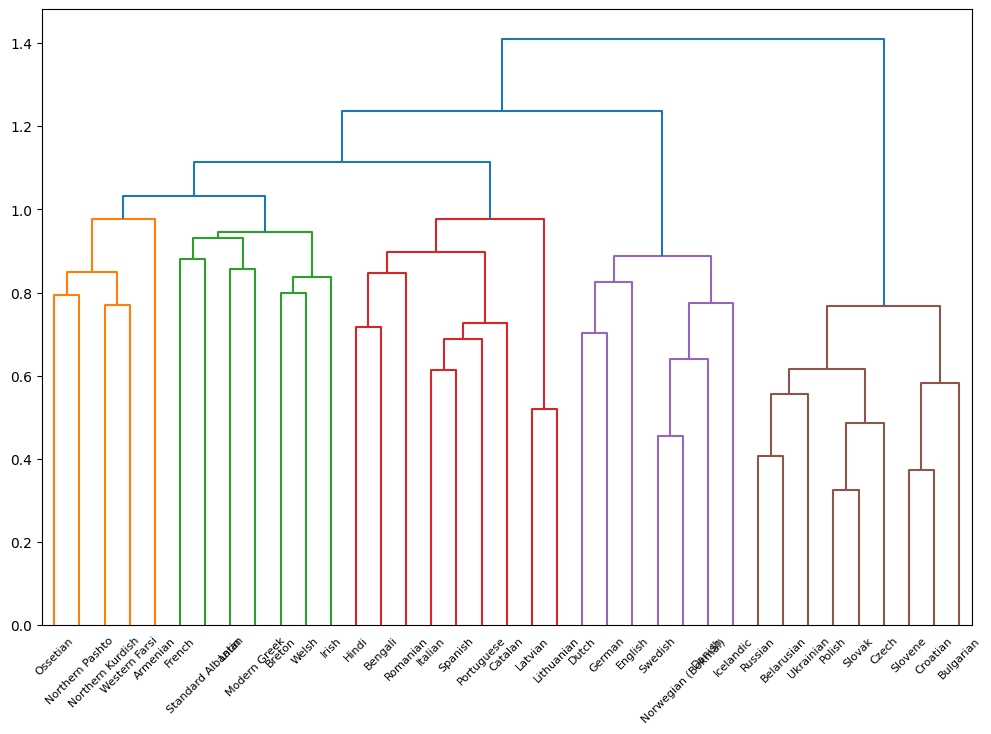

In [ ]:
linked_complete = linkage(confusion, 'complete')


#plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_complete,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

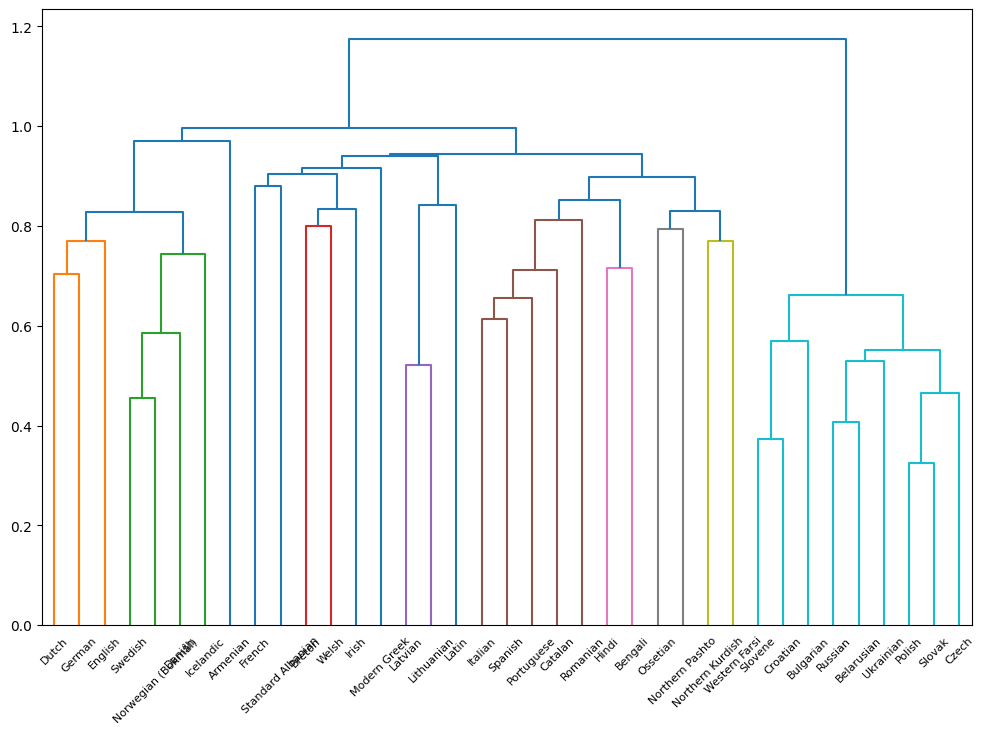

In [ ]:
linked_weighted = linkage(confusion, 'weighted')

#plot the results using dendrogram
def llf(id): return language_list[id]
plt.figure(figsize=(12, 8))
dendrogram(linked_weighted,
           p=100,
           truncate_mode="level",
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           leaf_label_func=llf)

plt.show()

***Question 7:*** Try three of the other linkage methods and describe how they change the results.

**A7: The other linkage methods change the results based on how hey separate the clusters up. For example, single separates out the least similar at each node. So instead of having the cluster of Balto-Slavic languages all the way on the right side, we see the langauges which are most unique from the others. Complete clustering brings Hindi and Bengali closer to the Italic languages and clusters French in with the celtic languages. Weighted linkage results in much smaller clusters overall, with more unique languages still clustered in at high nodes and separated out later.**


***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**A8: Giving the confusion matrix a larger number of concepts does not seem to change the clustering much and no previously noted 'errors' have been fixed. At 40 concepts, we see a decrease in the accuracy based on the subfamilies we know, separating Norhtern Pashto from the other Iranian languages and grouping Latin with the Balto-Slavic languages. At 100, again, its roughly the same categorization as 20 concepts but this time Ossetian is not clustered with the other Iranian languages. Since the 20 concepts were chosen by the top ranked ones, adding more concepts which are less prevalent does not seem to greatly alter our results.**

In [ ]:
# q8
num_concepts = 100
wordforms1 = wordforms1.loc[wordforms1.position_in_ranking <= num_concepts]

confusion8 = [[0 for j in range(len(language_list))] for i in range(len(language_list))]

for lang1_ind in range(len(language_list)):
  language1 = language_list[lang1_ind]
  lang1_wf = wordforms1.loc[wordforms1.name == language1]
  for lang2_ind in range(len(language_list)):
    language2 = language_list[lang2_ind]
    lang2_wf = wordforms1.loc[wordforms1.name == language2]
    distances = 0.0
    for concept in range(1,num_concepts):
        con1 = lang1_wf.loc[lang1_wf.position_in_ranking == concept]
        con2 = lang2_wf.loc[lang2_wf.position_in_ranking == concept]

        dist = 0.0
        counter = 0
        # distances += lp.align.pairwise.edit_dist(con1.IPA[1], con2.IPA[1], True)

        for ipa1 in con1.IPA:
            for ipa2 in con2.IPA:
                dist += lp.align.pairwise.edit_dist(ipa1, ipa2, True)
                # print(ipa1,"  ", ipa2, "   ", dist)

                counter += 1
                # print("dist is :" + str(dist) +" and counter is at: " + str(counter))

        if counter != 0:
            distances += dist / counter
    confusion8[lang1_ind][lang2_ind] = distances / num_concepts
language_list = list(language_list)

lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion8, language_list)

{0: ['Bengali', 'Hindi'],
 2: ['Northern Pashto', 'Western Farsi', 'Northern Kurdish'],
 5: ['Ossetian'],
 6: ['Armenian'],
 7: ['Modern Greek'],
 8: ['Standard Albanian'],
 9: ['Bulgarian',
  'Croatian',
  'Slovene',
  'Slovak',
  'Czech',
  'Polish',
  'Ukrainian',
  'Belarusian',
  'Russian',
  'Lithuanian',
  'Latvian'],
 20: ['Icelandic',
  'German',
  'Dutch',
  'Norwegian (Bokmål)',
  'Swedish',
  'Danish',
  'English'],
 27: ['Irish'],
 28: ['Welsh', 'Breton'],
 30: ['Latin', 'Catalan', 'Spanish', 'Italian', 'Portuguese', 'Romanian'],
 31: ['French']}